For Text Mining assignment

ONE: 1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

TWO: 1) Extract reviews of any product from ecommerce website like amazon

2) Perform emotion mining

## Importing Libraries and Datasets :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from textblob import TextBlob, Word
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings('ignore')

In [2]:
elon = pd.read_csv('Elon_musk.csv', encoding='latin-1')
elon

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [3]:
elon = elon.drop('Unnamed: 0', axis=1)
elon

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


#### Checking for number of Words in single tweet:

In [4]:
elon['word_count'] = elon['Text'].apply(lambda x: len(str(x).split(' ')))
elon[['Text', 'word_count']].head()

,Text,word_count
0,@kunalb11 Im an alien,4
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13
2,@joerogan @Spotify Great interview!,4
3,@gtera27 Doge is underestimated,4
4,@teslacn Congratulations Tesla China for amazi...,17


#### Checking for number of characters in single tweet:

In [5]:
elon['char_count'] = elon['Text'].str.len()
elon[['Text', 'char_count']].head()

,Text,char_count
0,@kunalb11 Im an alien,22
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,82
2,@joerogan @Spotify Great interview!,35
3,@gtera27 Doge is underestimated,31
4,@teslacn Congratulations Tesla China for amazi...,104


#### Calculating average word length:

In [6]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

elon['avg_word'] = elon['Text'].apply(lambda x: avg_word(x))
elon[['Text', 'avg_word']].head()

,Text,avg_word
0,@kunalb11 Im an alien,4.750000
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,5.384615
2,@joerogan @Spotify Great interview!,8.000000
3,@gtera27 Doge is underestimated,7.000000
4,@teslacn Congratulations Tesla China for amazi...,5.176471


#### Number of stopwords:

In [7]:
stop = stopwords.words('english')

elon['stopword'] = elon['Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
elon[['Text','stopword']].head()

,Text,stopword
0,@kunalb11 Im an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,4
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,5


#### Number of special characters:

In [8]:
elon['hastags'] = elon['Text'].apply(
    lambda x: len([x for x in x.split() if x.startswith('@')]))
elon[['Text','hastags']].head()

,Text,hastags
0,@kunalb11 Im an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1
2,@joerogan @Spotify Great interview!,2
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,1


In [9]:
elon['numerics'] = elon['Text'].apply(
    lambda x: lDen([x for x in x.split() if x.isdigit()]))
elon[['Text', 'numerics']].head()

,Text,numerics
0,@kunalb11 Im an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0


#### Checking for number of upper case words:

In [10]:
elon['upper'] = elon['Text'].apply(
    lambda x: len([x for x in x.split() if x.isupper()]))
elon[['Text', 'upper']].head()

,Text,upper
0,@kunalb11 Im an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0


# Text Preprocessing:
### Converting to lower Case:

In [11]:
elon['Text'] = elon['Text'].apply(
    lambda x: ' '.join(x.lower() for x in x.split()))
elon['Text'].head()

0                               @kunalb11 im an alien
1    @id_aa_carmack ray tracing on cyberpunk with h...
2                  @joerogan @spotify great interview!
3                      @gtera27 doge is underestimated
4    @teslacn congratulations tesla china for amazi...
Name: Text, dtype: object

### Removing Punctuation from text:

In [12]:
elon['Text'] = elon['Text'].str.replace('[^\w\s]','')
elon['Text'].head()

0                                 kunalb11 im an alien
1    id_aa_carmack ray tracing on cyberpunk with hd...
2                     joerogan spotify great interview
3                       gtera27 doge is underestimated
4    teslacn congratulations tesla china for amazin...
Name: Text, dtype: object

### Removing Stopwords from the text:

In [13]:
stop = stopwords.words('english')
elon['Text'] = elon['Text'].apply(
    lambda x: ' '.join(x for x in x.split() if x not in stop))
elon['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                     joerogan spotify great interview
3                          gtera27 doge underestimated
4    teslacn congratulations tesla china amazing ex...
Name: Text, dtype: object

### Removing common words:

In [14]:
freq = pd.Series(' '.join(elon['Text']).split()).value_counts()[:10]
freq

spacex            239
amp               218
tesla             166
erdayastronaut    142
rt                127
ppathole          123
flcnhvy           114
yes                86
great              76
teslaownerssv      73
dtype: int64

In [15]:
freq = list(freq.index)
elon['Text'] = elon['Text'].apply(lambda x: ' '.join(x for x in x.split() if x not in freq))
elon['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                           joerogan spotify interview
3                          gtera27 doge underestimated
4    teslacn congratulations china amazing executio...
Name: Text, dtype: object

### Removing rare words:

In [16]:
freq = pd.Series(' '.join(elon['Text']).split()).value_counts()[-10:]
freq

nyquil                1
musk                  1
negati                1
httpstco6ohta09s5l    1
carousel              1
joeingeneral          1
andrewbogut           1
typical               1
unusual               1
altho                 1
dtype: int64

In [17]:
freq = list(freq.index)
elon['Text'] = elon['Text'].apply(
    lambda x: ' '.join(x for x in x .split() if x not in freq))
elon['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                           joerogan spotify interview
3                          gtera27 doge underestimated
4    teslacn congratulations china amazing executio...
Name: Text, dtype: object

### Correcting missplelled words:

In [18]:
elon['Text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                                    kunalb11 in alien
1    id_aa_carmack ray tracing cyberpunk her nextle...
2                           joerogan specify interview
3                          gtera27 done underestimated
4    teslacn congratulations china amazing executio...
Name: Text, dtype: object

### Tokenization:

In [19]:
TextBlob(elon['Text'][1]).words

WordList(['id_aa_carmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried'])

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aditi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Stemming:

In [21]:
st = PorterStemmer()
elon['Text'][:5].apply(lambda x: ' '.join([st.stem(word) for word in x.split()]))

0                                    kunalb11 im alien
1    id_aa_carmack ray trace cyberpunk hdr nextleve...
2                           joerogan spotifi interview
3                              gtera27 doge underestim
4    teslacn congratul china amaz execut last year ...
Name: Text, dtype: object

### Lemmatization:

In [22]:
elon['Text'] = elon['Text'].apply(lambda x: ' '.join([Word(word).lemmatize() for word in x.split()]))
elon['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                           joerogan spotify interview
3                          gtera27 doge underestimated
4    teslacn congratulation china amazing execution...
Name: Text, dtype: object

### N-grams:

In [23]:
TextBlob(elon['Text'][0]).ngrams(2)

[WordList(['kunalb11', 'im']), WordList(['im', 'alien'])]

### Term Frequency:

In [24]:
tf1 = (elon['Text'][1:2]).apply(
    lambda x: pd.value_counts(x.split(' '))).sum(axis = 0).reset_index()
tf1.columns = ['words', 'tf']
tf1

,words,tf
0,id_aa_carmack,1
1,ray,1
2,tracing,1
3,cyberpunk,1
4,hdr,1
5,nextlevel,1
6,tried,1


### Inverse Document Frequency(IDF):

In [25]:
for i,word in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(
        elon.shape[0]/(len(elon[elon['Text'].str.contains(word)])))
tf1

,words,tf,idf
0,id_aa_carmack,1,4.166415
1,ray,1,5.035453
2,tracing,1,7.600402
3,cyberpunk,1,5.115496
4,hdr,1,6.907255
5,nextlevel,1,6.907255
6,tried,1,5.808643


### Term Frequency - Inverse Document Frequency (TF-IDF):

In [26]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,id_aa_carmack,1,4.166415,4.166415
1,ray,1,5.035453,5.035453
2,tracing,1,7.600402,7.600402
3,cyberpunk,1,5.115496,5.115496
4,hdr,1,6.907255,6.907255
5,nextlevel,1,6.907255,6.907255
6,tried,1,5.808643,5.808643


In [27]:
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, 
                        analyzer='word', stop_words='english', ngram_range=(1,1))
vect = tfidf.fit_transform(elon['Text'])
vect

<1999x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 7374 stored elements in Compressed Sparse Row format>

### Bag of Words:

In [28]:
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1), analyzer='word')
elon_bow = bow.fit_transform(elon['Text'])
elon_bow

<1999x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 8020 stored elements in Compressed Sparse Row format>

### Sentiment Analysis:

In [29]:
elon['Text'][:5].apply(lambda x: TextBlob(x).sentiment)

0                                 (-0.25, 0.75)
1                                    (0.0, 0.0)
2                                    (0.0, 0.0)
3                                    (0.0, 0.0)
4    (0.20000000000000004, 0.32222222222222224)
Name: Text, dtype: object

In [30]:
elon['sentiment'] = elon['Text'].apply(lambda x: TextBlob(x).sentiment[0])
elon[['Text', 'sentiment']].head()

,Text,sentiment
0,kunalb11 im alien,-0.25
1,id_aa_carmack ray tracing cyberpunk hdr nextle...,0.00
2,joerogan spotify interview,0.00
3,gtera27 doge underestimated,0.00
4,teslacn congratulation china amazing execution...,0.20


### Emotion Mining:

In [33]:
import codecs
import copy
import collections
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import twitter_samples

In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aditi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
with codecs.open('C:/Users/aditi/Downloads/ExcelR Asgn Docs/positive-words.txt', encoding='utf-8') as p:
    pos = p.read()
    print(pos)

;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
; 
; Opinion Lexicon: Positive
;
; This file contains a list of POSITIVE opinion words (or sentiment words).
;
; This file and the papers can all be downloaded from 
;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
;
; If you use this list, please cite one of the following two papers:
;
;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
;       Proceedings of the ACM SIGKDD International Conference on Knowledge 
;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
;       Washington, USA, 
;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
;       and Comparing Opinions on the Web." Proceedings of the 14th 
;       International World Wide Web conference (WWW-2005), May 10-14, 
;       2005, Chiba, Japan.
;
; Notes: 
;    1. The appearance of an opinion word in a sentence does not necessarily  
;       mean that the sentence expresse

In [36]:
with codecs.open('C:\\Users\\aditi\\Downloads\\ExcelR Asgn Docs\\negative-words.txt','r', encoding='ISO-8859-1') as n:
    neg = n.read()
    print(neg)

;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
; 
; Opinion Lexicon: Negative
;
; This file contains a list of NEGATIVE opinion words (or sentiment words).
;
; This file and the papers can all be downloaded from 
;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
;
; If you use this list, please cite one of the following two papers:
;
;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
;       Proceedings of the ACM SIGKDD International Conference on Knowledge 
;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
;       Washington, USA, 
;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
;       and Comparing Opinions on the Web." Proceedings of the 14th 
;       International World Wide Web conference (WWW-2005), May 10-14, 
;       2005, Chiba, Japan.
;
; Notes: 
;    1. The appearance of an opinion word in a sentence does not necessarily  
;       mean that the sentence expres

In [37]:
with codecs.open('C:\\Users\\aditi\\Downloads\\ExcelR Asgn Docs\\stop.txt', 'r', encoding='ISO-8859-1') as s:
    stop = s.read()
    print(stop)

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
against
ain't
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
apart
appear
appreciate
appropriate
are
aren't
around
as
aside
ask
asking
associated
at
available
away
awfully
b
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
believe
below
beside
besides
best
better
between
beyond
both
brief
but
by
c
c'mon
c's
came
can
can't
cannot
cant
cause
causes
certain
certainly
changes
clearly
co
com
come
comes
concerning
consequently
consider
considering
contain
containing
contains
corresponding
could
couldn't
course
currently
d
definitely
described
despite
did
didn't
different
do
does
doesn't
doing
don't
done
down
downwards
during
e
each
edu
eg
eight
either
else
elsewhere
enough
entirely
especially
et
etc
even
ever
every
everybody
everyone
everything
everywhere
ex
exactly
example

In [38]:
nltk.download('twitter_samples')
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
text = twitter_samples.strings('tweets.20150430-223406.json')
tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
tweet_tokens1 = twitter_samples.tokenized('negative_tweets.json')
print(tweet_tokens[0])
print('\n\n',tweet_tokens1[0])

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\aditi\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)']


 ['hopeless', 'for', 'tmr', ':(']


2.	TWO: Extract reviews of any product from ecommerce website like amazon. Perform emotion mining

## Importing Libraries and datasets:

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy
from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [40]:
reviews = pd.read_csv('amazon reviews.csv')
reviews

,review rating,review text
0,5,I've always wanted to get a S Series flagship....
1,4,I have had my relationship broken with Samsung...
2,5,Truly Ultra To Rule Every Other Phone - Epito...
3,5,Never Regret
4,4,Overheating is the only issue I can see on the...
...,...,...
168,5,Nice phone
169,2,I'm not satisfied 😒. Battery life is below ave...
170,5,I think this is the best phone of 2022 it has ...
171,5,I purchased this model offline samsung store H...


### Renaming the columns:

In [41]:
reviews.rename(columns={'review rating':'rating', 'review text':'comment'},inplace=True)

In [42]:
reviews

,rating,comment
0,5,I've always wanted to get a S Series flagship....
1,4,I have had my relationship broken with Samsung...
2,5,Truly Ultra To Rule Every Other Phone - Epito...
3,5,Never Regret
4,4,Overheating is the only issue I can see on the...
...,...,...
168,5,Nice phone
169,2,I'm not satisfied 😒. Battery life is below ave...
170,5,I think this is the best phone of 2022 it has ...
171,5,I purchased this model offline samsung store H...


## Text Preprocessing:

In [43]:
reviews = [comment.strip() for comment in reviews.comment]
reviews = [comment for comment in reviews if comment] 
reviews[0:10]

['I\'ve always wanted to get a S Series flagship. I have always wanted to get a Note Series flagship. Now I have both of them in the S22 Ultra.\n\nAfter a long wait, Samsung finally merged the S and Note series which was inevitable and I am glad they did.\n\nThe S22 Ultra is the phone to beat this year. Samsung launched the S series earlier than expected and we have already got a phone of the year contender 3 months into the year. Don\'t think it gets any better than this no matter what flagship any competition introduces.\n\nBefore this, I was using One Plus 7 Pro and the S22 Ultra makes it feel like a Xiaomi phone. I was not ready to be blown away considering that OP7P is a pretty good phone to begin with. But it improves on every aspect of a 2-3 year old flagship and this is Android at it\'s peak (until Samsung comes out with another banger next year)\n\nIt goes without saying that the camera on S22 Ultra is the highlight followed by the S-Pen. And the conversation cannot be conside

### Joining the list into one string/text:

In [44]:
reviews_text = ' '.join(reviews)
reviews_text

'I\'ve always wanted to get a S Series flagship. I have always wanted to get a Note Series flagship. Now I have both of them in the S22 Ultra.\n\nAfter a long wait, Samsung finally merged the S and Note series which was inevitable and I am glad they did.\n\nThe S22 Ultra is the phone to beat this year. Samsung launched the S series earlier than expected and we have already got a phone of the year contender 3 months into the year. Don\'t think it gets any better than this no matter what flagship any competition introduces.\n\nBefore this, I was using One Plus 7 Pro and the S22 Ultra makes it feel like a Xiaomi phone. I was not ready to be blown away considering that OP7P is a pretty good phone to begin with. But it improves on every aspect of a 2-3 year old flagship and this is Android at it\'s peak (until Samsung comes out with another banger next year)\n\nIt goes without saying that the camera on S22 Ultra is the highlight followed by the S-Pen. And the conversation cannot be consider

### Removing the punctuations from the text:

In [45]:
no_punc = reviews_text.translate(str.maketrans('','',string.punctuation))
no_punc

'Ive always wanted to get a S Series flagship I have always wanted to get a Note Series flagship Now I have both of them in the S22 Ultra\n\nAfter a long wait Samsung finally merged the S and Note series which was inevitable and I am glad they did\n\nThe S22 Ultra is the phone to beat this year Samsung launched the S series earlier than expected and we have already got a phone of the year contender 3 months into the year Dont think it gets any better than this no matter what flagship any competition introduces\n\nBefore this I was using One Plus 7 Pro and the S22 Ultra makes it feel like a Xiaomi phone I was not ready to be blown away considering that OP7P is a pretty good phone to begin with But it improves on every aspect of a 23 year old flagship and this is Android at its peak until Samsung comes out with another banger next year\n\nIt goes without saying that the camera on S22 Ultra is the highlight followed by the SPen And the conversation cannot be considered over until we menti

## Tokenization:

In [46]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aditi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aditi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
text_tokens = word_tokenize(no_punc)
print(text_tokens[0:50])

['Ive', 'always', 'wanted', 'to', 'get', 'a', 'S', 'Series', 'flagship', 'I', 'have', 'always', 'wanted', 'to', 'get', 'a', 'Note', 'Series', 'flagship', 'Now', 'I', 'have', 'both', 'of', 'them', 'in', 'the', 'S22', 'Ultra', 'After', 'a', 'long', 'wait', 'Samsung', 'finally', 'merged', 'the', 'S', 'and', 'Note', 'series', 'which', 'was', 'inevitable', 'and', 'I', 'am', 'glad', 'they', 'did']


In [48]:
len(text_tokens)

13350

### Removing stopwords from text:

In [49]:
stop_words = stopwords.words('english')

stopwords_list = ['I', 'A', 'the']
stop_words.extend(stopwords_list)

no_stop_token = [word for word in text_tokens if not word in stop_words]
print(no_stop_token)

['Ive', 'always', 'wanted', 'get', 'S', 'Series', 'flagship', 'always', 'wanted', 'get', 'Note', 'Series', 'flagship', 'Now', 'S22', 'Ultra', 'After', 'long', 'wait', 'Samsung', 'finally', 'merged', 'S', 'Note', 'series', 'inevitable', 'glad', 'The', 'S22', 'Ultra', 'phone', 'beat', 'year', 'Samsung', 'launched', 'S', 'series', 'earlier', 'expected', 'already', 'got', 'phone', 'year', 'contender', '3', 'months', 'year', 'Dont', 'think', 'gets', 'better', 'matter', 'flagship', 'competition', 'introduces', 'Before', 'using', 'One', 'Plus', '7', 'Pro', 'S22', 'Ultra', 'makes', 'feel', 'like', 'Xiaomi', 'phone', 'ready', 'blown', 'away', 'considering', 'OP7P', 'pretty', 'good', 'phone', 'begin', 'But', 'improves', 'every', 'aspect', '23', 'year', 'old', 'flagship', 'Android', 'peak', 'Samsung', 'comes', 'another', 'banger', 'next', 'year', 'It', 'goes', 'without', 'saying', 'camera', 'S22', 'Ultra', 'highlight', 'followed', 'SPen', 'And', 'conversation', 'considered', 'mention', '100x', 'z

### Converting text into lowercase:

In [50]:
lower_words = [comment.lower() for comment in no_stop_token]
print(lower_words)

['ive', 'always', 'wanted', 'get', 's', 'series', 'flagship', 'always', 'wanted', 'get', 'note', 'series', 'flagship', 'now', 's22', 'ultra', 'after', 'long', 'wait', 'samsung', 'finally', 'merged', 's', 'note', 'series', 'inevitable', 'glad', 'the', 's22', 'ultra', 'phone', 'beat', 'year', 'samsung', 'launched', 's', 'series', 'earlier', 'expected', 'already', 'got', 'phone', 'year', 'contender', '3', 'months', 'year', 'dont', 'think', 'gets', 'better', 'matter', 'flagship', 'competition', 'introduces', 'before', 'using', 'one', 'plus', '7', 'pro', 's22', 'ultra', 'makes', 'feel', 'like', 'xiaomi', 'phone', 'ready', 'blown', 'away', 'considering', 'op7p', 'pretty', 'good', 'phone', 'begin', 'but', 'improves', 'every', 'aspect', '23', 'year', 'old', 'flagship', 'android', 'peak', 'samsung', 'comes', 'another', 'banger', 'next', 'year', 'it', 'goes', 'without', 'saying', 'camera', 's22', 'ultra', 'highlight', 'followed', 'spen', 'and', 'conversation', 'considered', 'mention', '100x', 'z

### Stemming:

In [51]:
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['ive', 'alway', 'want', 'get', 's', 'seri', 'flagship', 'alway', 'want', 'get', 'note', 'seri', 'flagship', 'now', 's22', 'ultra', 'after', 'long', 'wait', 'samsung', 'final', 'merg', 's', 'note', 'seri', 'inevit', 'glad', 'the', 's22', 'ultra', 'phone', 'beat', 'year', 'samsung', 'launch', 's', 'seri', 'earlier', 'expect', 'alreadi', 'got', 'phone', 'year', 'contend', '3', 'month', 'year', 'dont', 'think', 'get', 'better', 'matter', 'flagship', 'competit', 'introduc', 'befor', 'use', 'one', 'plu', '7', 'pro', 's22', 'ultra', 'make', 'feel', 'like', 'xiaomi', 'phone', 'readi', 'blown', 'away', 'consid', 'op7p', 'pretti', 'good', 'phone', 'begin', 'but', 'improv', 'everi', 'aspect', '23', 'year', 'old', 'flagship', 'android', 'peak', 'samsung', 'come', 'anoth', 'banger', 'next', 'year', 'it', 'goe', 'without', 'say', 'camera', 's22', 'ultra', 'highlight', 'follow', 'spen', 'and', 'convers', 'consid', 'mention', '100x', 'zoom', 'amaz', 'everi', 'time', 'comparison', 'shot', 'take', 'nor

### Lemmatization:

In [52]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(' '.join(lower_words))
print(doc)

ive always wanted get s series flagship always wanted get note series flagship now s22 ultra after long wait samsung finally merged s note series inevitable glad the s22 ultra phone beat year samsung launched s series earlier expected already got phone year contender 3 months year dont think gets better matter flagship competition introduces before using one plus 7 pro s22 ultra makes feel like xiaomi phone ready blown away considering op7p pretty good phone begin but improves every aspect 23 year old flagship android peak samsung comes another banger next year it goes without saying camera s22 ultra highlight followed spen and conversation considered mention 100x zoom amazed every time comparison shots take normal picture 100x zoom find detail possible see naked eye ill let judge going pictures uploaded pigeon vs park the display puts mobile based oled screens shame it difficult describe words see colors sharpness text adaptive refresh rate qhd resolution sight behold dont care batter

In [53]:
lemmas = [token.lemma_ for token in doc]
print(lemmas)

['I', 've', 'always', 'want', 'get', 's', 'series', 'flagship', 'always', 'want', 'get', 'note', 'series', 'flagship', 'now', 's22', 'ultra', 'after', 'long', 'wait', 'samsung', 'finally', 'merge', 's', 'note', 'series', 'inevitable', 'glad', 'the', 's22', 'ultra', 'phone', 'beat', 'year', 'samsung', 'launch', 's', 'series', 'early', 'expect', 'already', 'get', 'phone', 'year', 'contender', '3', 'month', 'year', 'do', 'not', 'think', 'get', 'well', 'matter', 'flagship', 'competition', 'introduce', 'before', 'use', 'one', 'plus', '7', 'pro', 's22', 'ultra', 'makes', 'feel', 'like', 'xiaomi', 'phone', 'ready', 'blow', 'away', 'consider', 'op7p', 'pretty', 'good', 'phone', 'begin', 'but', 'improve', 'every', 'aspect', '23', 'year', 'old', 'flagship', 'android', 'peak', 'samsung', 'come', 'another', 'banger', 'next', 'year', 'it', 'go', 'without', 'say', 'camera', 's22', 'ultra', 'highlight', 'follow', 'spen', 'and', 'conversation', 'consider', 'mention', '100x', 'zoom', 'amazed', 'every',

In [54]:
clean_review = ' '.join(lemmas)
clean_review

"I ve always want get s series flagship always want get note series flagship now s22 ultra after long wait samsung finally merge s note series inevitable glad the s22 ultra phone beat year samsung launch s series early expect already get phone year contender 3 month year do not think get well matter flagship competition introduce before use one plus 7 pro s22 ultra makes feel like xiaomi phone ready blow away consider op7p pretty good phone begin but improve every aspect 23 year old flagship android peak samsung come another banger next year it go without say camera s22 ultra highlight follow spen and conversation consider mention 100x zoom amazed every time comparison shot take normal picture 100x zoom find detail possible see naked eye ill let judge go picture upload pigeon vs park the display put mobile base oled screen shame it difficult describe word see color sharpness text adaptive refresh rate qhd resolution sight behold do not care battery life do not chose make compromise exp

# Feature Extraction:

### USing CountVectorizer:

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
review_cv = cv.fit_transform(lemmas)

In [56]:
print(cv.vocabulary_)

{'ve': 1538, 'always': 132, 'want': 1566, 'get': 609, 'series': 1291, 'flagship': 566, 'note': 960, 'now': 968, 's22': 1241, 'ultra': 1497, 'after': 115, 'long': 826, 'wait': 1559, 'samsung': 1252, 'finally': 552, 'merge': 873, 'inevitable': 719, 'glad': 616, 'the': 1441, 'phone': 1072, 'beat': 202, 'year': 1628, 'launch': 791, 'early': 464, 'expect': 510, 'already': 129, 'contender': 343, 'month': 903, 'do': 441, 'not': 956, 'think': 1451, 'well': 1584, 'matter': 862, 'competition': 328, 'introduce': 739, 'before': 207, 'use': 1524, 'one': 994, 'plus': 1092, 'pro': 1134, 'makes': 845, 'feel': 543, 'like': 810, 'xiaomi': 1624, 'ready': 1180, 'blow': 227, 'away': 177, 'consider': 341, 'op7p': 1002, 'pretty': 1127, 'good': 624, 'begin': 208, 'but': 263, 'improve': 705, 'every': 496, 'aspect': 163, '23': 35, 'old': 990, 'android': 140, 'peak': 1051, 'come': 317, 'another': 146, 'banger': 191, 'next': 937, 'it': 750, 'go': 620, 'without': 1603, 'say': 1259, 'camera': 272, 'highlight': 669,

In [57]:
print(review_cv.toarray()[150:300])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [58]:
print(review_cv.toarray().shape)

(8357, 1668)


### Using CountVectorizer with N-gram:

In [59]:
cv_ngram_range = CountVectorizer(analyzer='word', ngram_range=(1,3), max_features=100)
bow_matrix = cv_ngram_range.fit_transform(lemmas)

In [60]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix.toarray())

['1010', '12', '13', 'also', 'amazing', 'android', 'app', 'awesome', 'battery', 'but', 'buy', 'camera', 'charge', 'come', 'compare', 'con', 'dark', 'day', 'delivery', 'device', 'display', 'do', 'even', 'everything', 'experience', 'fast', 'feature', 'feel', 'find', 'fingerprint', 'flagship', 'gb', 'get', 'give', 'go', 'good', 'great', 'hand', 'have', 'heating', 'heavy', 'iphone', 'issue', 'it', 'its', 'keep', 'life', 'like', 'look', 'love', 'make', 'mobile', 'money', 'much', 'need', 'nice', 'no', 'not', 'note', 'offer', 'one', 'oneplus', 'pen', 'perfectly', 'performance', 'phone', 'plus', 'price', 'pro', 'protector', 'purchase', 'quality', 'really', 'review', 's22', 'samsung', 'screen', 'see', 'series', 'smartphone', 'so', 'software', 'spen', 'take', 'the', 'thing', 'this', 'though', 'time', 'ultra', 'update', 'use', 'video', 'want', 'well', 'work', 'would', 'year', 'you', 'zoom']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0

### TF-IDF Vectorizer:

In [61]:
tfidfv_ngram_max_features = TfidfVectorizer(norm='', analyzer='word', ngram_range=(1,3), max_features=500)
tfidf_matrix_ngram = tfidfv_ngram_max_features.fit_transform(lemmas)

In [62]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matrix_ngram.toarray())

['10', '100x', '1010', '11', '11th', '12', '120', '12th', '13', '15', '2022', '23', '256', '45w', '512', '55', '810', '910', 'aap', 'able', 'absolutely', 'accept', 'accessory', 'accurate', 'actually', 'adapter', 'adaptive', 'add', 'addition', 'after', 'ai', 'all', 'almost', 'along', 'already', 'also', 'although', 'always', 'amazing', 'amazon', 'and', 'android', 'another', 'anyone', 'app', 'apple', 'apply', 'aspect', 'assistant', 'atleast', 'aur', 'available', 'average', 'away', 'awesome', 'back', 'backup', 'bad', 'bar', 'base', 'basis', 'battery', 'be', 'beast', 'beat', 'beauty', 'become', 'begin', 'big', 'bit', 'bixby', 'black', 'bloatware', 'blow', 'box', 'brand', 'break', 'brick', 'brightness', 'bring', 'buck', 'budget', 'bug', 'build', 'but', 'buy', 'call', 'camera', 'can', 'capture', 'care', 'case', 'chance', 'change', 'charge', 'charger', 'chip', 'class', 'click', 'color', 'colour', 'combo', 'come', 'compare', 'comparison', 'competition', 'complaint', 'complete', 'con', 'consider

### Named Entity Recognition (NER):

In [63]:
# Parts of speech (POS) tagging
nlp = spacy.load('en_core_web_sm')
one_block = clean_review
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [64]:
for token in doc_block[100:200]:
    print(token, token.pos_)

s22 NOUN
ultra NOUN
highlight NOUN
follow VERB
spen NOUN
and CCONJ
conversation NOUN
consider VERB
mention VERB
100x NOUN
zoom NOUN
amazed ADJ
every DET
time NOUN
comparison NOUN
shot NOUN
take VERB
normal ADJ
picture NOUN
100x PROPN
zoom NOUN
find NOUN
detail NOUN
possible ADJ
see VERB
naked ADJ
eye NOUN
ill PROPN
let VERB
judge NOUN
go VERB
picture NOUN
upload NOUN
pigeon NOUN
vs ADP
park NOUN
the DET
display NOUN
put VERB
mobile ADJ
base NOUN
oled VERB
screen NOUN
shame NOUN
it PRON
difficult ADJ
describe NOUN
word NOUN
see VERB
color NOUN
sharpness NOUN
text NOUN
adaptive ADJ
refresh NOUN
rate NOUN
qhd NOUN
resolution NOUN
sight NOUN
behold NOUN
do AUX
not PART
care VERB
battery NOUN
life NOUN
do AUX
not PART
chose VERB
make VERB
compromise NOUN
experience NOUN
use VERB
phone NOUN
the DET
spen ADJ
lot NOUN
people NOUN
say VERB
gimmick PROPN
nice ADJ
addition NOUN
find VERB
use NOUN
often ADV
browse VERB
internet NOUN
simply ADV
watch VERB
youtube NOUN
really ADV
like ADP
smart ADJ


### Emotion Mining:

In [65]:
import text2emotion as te

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aditi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aditi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aditi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [66]:
te.get_emotion(clean_review)

{'Happy': 0.25, 'Angry': 0.04, 'Surprise': 0.18, 'Sad': 0.21, 'Fear': 0.33}

In [67]:
with open('C:\\Users\\aditi\\Downloads\\ExcelR Asgn Docs\\positive-words.txt', 'r') as p:
    pos = p.read().split('\n')
    print(pos)

[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;', '; ', '; Opinion Lexicon: Positive', ';', '; This file contains a list of POSITIVE opinion words (or sentiment words).', ';', '; This file and the papers can all be downloaded from ', ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html', ';', '; If you use this list, please cite one of the following two papers:', ';', ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." ', ';       Proceedings of the ACM SIGKDD International Conference on Knowledge ', ';       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, ', ';       Washington, USA, ', ';   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing ', ';       and Comparing Opinions on the Web." Proceedings of the 14th ', ';       International World Wide Web conference (WWW-2005), May 10-14, ', ';       2005, Chiba, Japan.', ';', '; Notes: ', ';    1. The appearance of an opinion word in a senten

In [68]:
pos_ = ' '.join([word for word in text_tokens if word in pos])

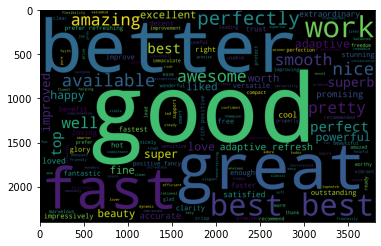

In [69]:
worldcloudp = WordCloud(background_color='black', width=3800, height=2400).generate(pos_)
plt.imshow(worldcloudp)

In [70]:
with open('C:\\Users\\aditi\\Downloads\\ExcelR Asgn Docs\\negative-words.txt', 'r') as n:
    neg = n.read().split('\n')
    print(neg)

[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;', '; ', '; Opinion Lexicon: Negative', ';', '; This file contains a list of NEGATIVE opinion words (or sentiment words).', ';', '; This file and the papers can all be downloaded from ', ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html', ';', '; If you use this list, please cite one of the following two papers:', ';', ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." ', ';       Proceedings of the ACM SIGKDD International Conference on Knowledge ', ';       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, ', ';       Washington, USA, ', ';   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing ', ';       and Comparing Opinions on the Web." Proceedings of the 14th ', ';       International World Wide Web conference (WWW-2005), May 10-14, ', ';       2005, Chiba, Japan.', ';', '; Notes: ', ';    1. The appearance of an opinion word in a sent

In [71]:
neg_ = ' '.join([word for word in text_tokens if word in neg])

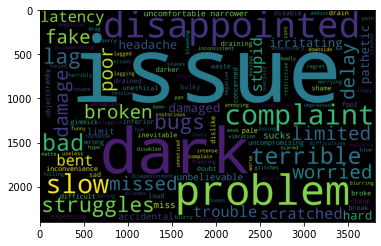

In [72]:
worldcloudn = WordCloud(background_color='black', width=3800, height=2400).generate(neg_)
plt.imshow(worldcloudn)

In [73]:
with open('C:\\Users\\aditi\\Downloads\\ExcelR Asgn Docs\\negative-words.txt', 'r') as s:
    stp = s.read().split('\n')
    print(stp)

[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;', '; ', '; Opinion Lexicon: Negative', ';', '; This file contains a list of NEGATIVE opinion words (or sentiment words).', ';', '; This file and the papers can all be downloaded from ', ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html', ';', '; If you use this list, please cite one of the following two papers:', ';', ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." ', ';       Proceedings of the ACM SIGKDD International Conference on Knowledge ', ';       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, ', ';       Washington, USA, ', ';   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing ', ';       and Comparing Opinions on the Web." Proceedings of the 14th ', ';       International World Wide Web conference (WWW-2005), May 10-14, ', ';       2005, Chiba, Japan.', ';', '; Notes: ', ';    1. The appearance of an opinion word in a sent

In [74]:
stp_ = ' '.join([word for word in text_tokens if word in stp])

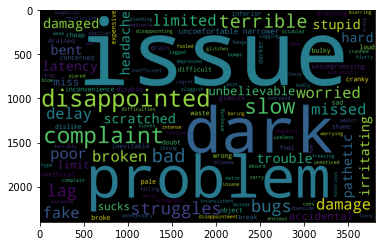

In [75]:
worldclouds = WordCloud(background_color='black', width=3800, height=2400).generate(stp_)
plt.imshow(worldclouds)